In [1]:
from ugropy import abdulelah_gani, abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/tm.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(1, 220, 220, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

df.dropna(inplace=True)

print(len(df))

9180


In [3]:
for idx, smiles in enumerate(df.index):
    try:  
        solution = abdulelah_gani_p.get_groups(smiles, "smiles", search_multiple_solutions=True)
    except Exception as e:
        print(smiles)
        print(idx)
        print(df.loc[smiles])
        raise e        
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if all([sol.subgroups_numbers != row_dict for sol in solution]):
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print("\n".join(str(sol.subgroups) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print("\n".join(str(sol.subgroups_numbers) for sol in solution))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        gani_groups = {}
        for group, ocurr in row_dict.items():
            group_name = abdulelah_gani_p.subgroups_info.loc[abdulelah_gani_p.subgroups_info["group_number"] == group].index[0]
            gani_groups[group_name] = ocurr
            
        print("Gani group names:")
        print(gani_groups)
        
        wrong_smiles = smiles
        break


O=C(O)CNCP(=O)(O)O
3
Subgrupos:
{'CH2': 1, 'OH': 2, 'COOH': 1, 'CH2NH': 1, 'P=O': 1}
Subgrupos por número:
{2: 1, 29: 2, 31: 1, 58: 1, 201: 1}
Gani: 
{1: {'O=C(O)CNCP(=O)(O)O': nan}, 2: {'O=C(O)CNCP(=O)(O)O': 1.0}, 3: {'O=C(O)CNCP(=O)(O)O': nan}, 4: {'O=C(O)CNCP(=O)(O)O': nan}, 5: {'O=C(O)CNCP(=O)(O)O': nan}, 6: {'O=C(O)CNCP(=O)(O)O': nan}, 7: {'O=C(O)CNCP(=O)(O)O': nan}, 8: {'O=C(O)CNCP(=O)(O)O': nan}, 9: {'O=C(O)CNCP(=O)(O)O': nan}, 10: {'O=C(O)CNCP(=O)(O)O': nan}, 11: {'O=C(O)CNCP(=O)(O)O': nan}, 12: {'O=C(O)CNCP(=O)(O)O': nan}, 13: {'O=C(O)CNCP(=O)(O)O': nan}, 14: {'O=C(O)CNCP(=O)(O)O': nan}, 15: {'O=C(O)CNCP(=O)(O)O': nan}, 16: {'O=C(O)CNCP(=O)(O)O': nan}, 17: {'O=C(O)CNCP(=O)(O)O': nan}, 18: {'O=C(O)CNCP(=O)(O)O': nan}, 19: {'O=C(O)CNCP(=O)(O)O': nan}, 20: {'O=C(O)CNCP(=O)(O)O': nan}, 21: {'O=C(O)CNCP(=O)(O)O': nan}, 22: {'O=C(O)CNCP(=O)(O)O': nan}, 23: {'O=C(O)CNCP(=O)(O)O': nan}, 24: {'O=C(O)CNCP(=O)(O)O': nan}, 25: {'O=C(O)CNCP(=O)(O)O': nan}, 26: {'O=C(O)CNCP(=O)(O)O': nan}, 

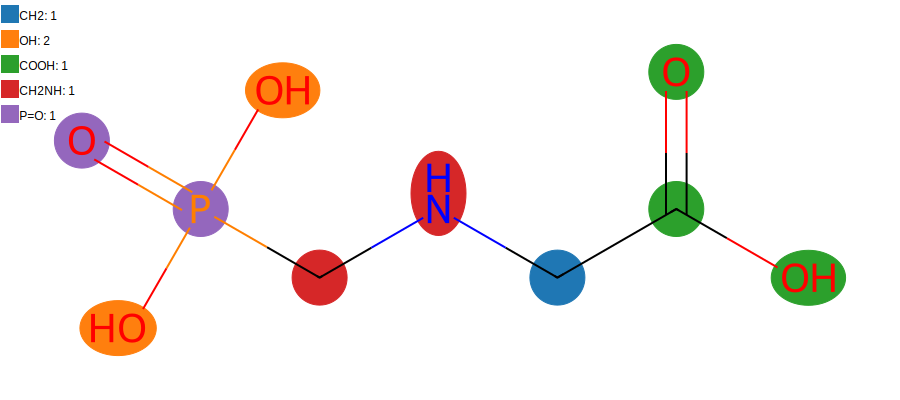

In [4]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=900, height=400)

In [5]:
sm = abdulelah_gani.get_groups(wrong_smiles, "smiles")

sm.ig_formation_enthalpy

<Quantity(-737.554225, 'kilojoule / mole')>